<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis Analysis</font>

## <font color='steelblue'>Tasks</font>

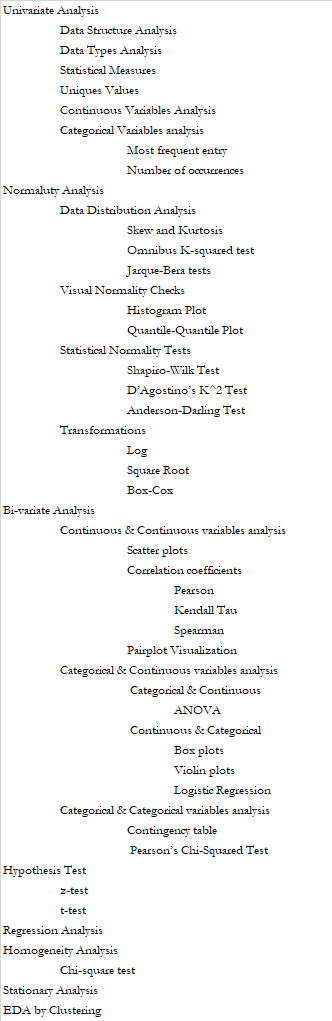
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_04_08_20_vacunacion_gripe_train_and_test.csv</font>
- <font color='steelblue'> <b>No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(ggplot2)
library(summarytools)
library(GGally)
library(nortest)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 21736 Columns: 49
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (45): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
259,V Centenario,2022,34,0,0,27.278748,0.16995588,2.297067,940.0420,⋯,0.5151383,0.09258503,0.6406787,0.7028586,2100118.9,15131.524,60,24,0,TRUE
260,Valdeacederas,2022,8,0,0,9.577289,1.26491004,1.890425,944.1770,⋯,0.3863876,0.13151901,0.5451465,0.6277335,1164622.0,22498.286,56,15,0,TRUE
041,Canillejas,2022,9,0,0,8.536554,3.12288116,2.418071,949.7179,⋯,0.3129631,0.13926119,0.4600730,0.5346482,1597474.5,17939.566,72,24,0,TRUE
025,Barajas,2022,49,292,280,9.065363,7.31388668,1.562328,941.8342,⋯,0.4611972,0.10460043,0.5920292,0.6590530,3816572.0,5893.247,196,77,292,TRUE
046,Castelló,2022,24,0,0,29.905728,0.01366852,2.564749,940.5669,⋯,0.7018126,0.06114283,0.4717699,0.5025317,870986.8,17738.501,46,21,0,TRUE


**Tamaño de Memoria** de los datos

In [9]:
object.size(data)

8518040 bytes

**Structure of non-numerical features**

In [10]:
# Display non-numerical features
data |> select(where(~ !is.numeric(.x))) |> freq()

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
001,76,0.3496503,0.3496503,0.3496503,0.3496503
002,76,0.3496503,0.6993007,0.3496503,0.6993007
003,76,0.3496503,1.0489510,0.3496503,1.0489510
004,76,0.3496503,1.3986014,0.3496503,1.3986014
005,76,0.3496503,1.7482517,0.3496503,1.7482517
006,76,0.3496503,2.0979021,0.3496503,2.0979021
007,76,0.3496503,2.4475524,0.3496503,2.4475524
008,76,0.3496503,2.7972028,0.3496503,2.7972028
009,76,0.3496503,3.1468531,0.3496503,3.1468531
010,76,0.3496503,3.4965035,0.3496503,3.4965035


**Structure of numerical features**

In [11]:
data |> select(where(is.numeric)) |> descr()


,ano,area,benzene,campana,capacidad_zona,co,densidad_hab_km,interes_gripe,n_citas,n_vacunas,⋯,t6_1,t7_1,t8_1,t9_1,Target,tasa_mayores,tasa_riesgo,tmed,tuits_gripe,velmedia
Mean,2.021842e+03,2.807453e+07,3.814543e-01,2.021533e+03,5.963287e+03,3.953931e-01,1.404679e+04,4.566216e+01,1.179666e+02,1.241379e+02,⋯,2.049836e-01,5.623174e-02,4.458174e-02,3.938860e-01,1.241379e+02,1.989159e-02,1.012831e-02,14.9101451,1.656081e+02,2.620194e+00
Std.Dev,5.393256e-01,6.424071e+07,3.303935e-01,5.416236e-01,2.664643e+03,1.271542e-01,1.353990e+04,2.568964e+01,1.518025e+02,1.595989e+02,⋯,8.209746e-02,1.764085e-02,1.811708e-02,1.565758e-01,1.595989e+02,1.035984e-02,4.842955e-03,7.6269778,1.408772e+02,9.040785e-01
Min,2.021000e+03,1.875459e+05,-1.857545e+00,2.021000e+03,7.000000e+02,-1.946155e-02,1.086010e+01,8.000000e+00,0.000000e+00,0.000000e+00,⋯,7.291938e-02,2.999818e-02,1.912755e-02,1.304158e-01,0.000000e+00,-1.008049e-02,-4.444603e-03,-6.2468686,2.400000e+01,2.354252e-01
Q1,2.022000e+03,9.179467e+05,1.893206e-01,2.021000e+03,4.093000e+03,3.064281e-01,1.284547e+03,2.400000e+01,0.000000e+00,0.000000e+00,⋯,1.445879e-01,4.249825e-02,2.987584e-02,2.614530e-01,0.000000e+00,1.318869e-02,7.052395e-03,9.0535717,8.000000e+01,1.973732e+00
Median,2.022000e+03,2.330025e+06,3.257881e-01,2.022000e+03,5.587000e+03,3.853766e-01,1.084919e+04,4.050000e+01,0.000000e+00,0.000000e+00,⋯,1.887360e-01,5.346635e-02,4.113499e-02,3.589233e-01,0.000000e+00,1.968084e-02,9.790127e-03,12.5060866,1.230000e+02,2.527693e+00
Q3,2.022000e+03,1.746813e+07,4.872180e-01,2.022000e+03,7.228000e+03,4.629737e-01,2.378904e+04,6.800000e+01,2.270000e+02,2.390000e+02,⋯,2.511757e-01,6.792861e-02,5.590805e-02,5.151383e-01,2.390000e+02,2.677268e-02,1.321121e-02,20.8677989,2.000000e+02,3.198881e+00
Max,2.023000e+03,5.194484e+08,6.604033e+00,2.023000e+03,1.571700e+04,1.238833e+00,5.574637e+04,1.000000e+02,8.180000e+02,8.450000e+02,⋯,5.035033e-01,1.533831e-01,1.385863e-01,7.346398e-01,8.450000e+02,5.810277e-02,2.324583e-02,32.7879983,8.540000e+02,8.948194e+00
MAD,0.000000e+00,2.694920e+06,2.095819e-01,1.482600e+00,2.249845e+03,1.162993e-01,1.503208e+04,3.113460e+01,0.000000e+00,0.000000e+00,⋯,7.362755e-02,1.735225e-02,1.793902e-02,1.645230e-01,0.000000e+00,9.916336e-03,4.459869e-03,7.9952195,8.599080e+01,8.970706e-01
IQR,0.000000e+00,1.655018e+07,2.978961e-01,1.000000e+00,3.135000e+03,1.565361e-01,2.250449e+04,4.400000e+01,2.270000e+02,2.390000e+02,⋯,1.065878e-01,2.543036e-02,2.603221e-02,2.536853e-01,2.390000e+02,1.358400e-02,6.158811e-03,11.8138905,1.200000e+02,1.225057e+00
CV,2.667496e-04,2.288221e+00,8.661417e-01,2.679271e-04,4.468413e-01,3.215894e-01,9.639141e-01,5.626023e-01,1.286827e+00,1.285658e+00,⋯,4.005074e-01,3.137169e-01,4.063789e-01,3.975155e-01,1.285658e+00,5.208151e-01,4.781603e-01,0.5115294,8.506662e-01,3.450427e-01


## Data Types

**Tipo** de datos

In [12]:
sapply(data, class)
glimpse(data)

GEOCODIGO            DESBDT               ano            semana 
      "character"       "character"         "numeric"         "numeric" 
        n_vacunas           n_citas              tmed              prec 
        "numeric"         "numeric"         "numeric"         "numeric" 
         velmedia           presMax           benzene                co 
        "numeric"         "numeric"         "numeric"         "numeric" 
               no               no2               nox                o3 
        "numeric"         "numeric"         "numeric"         "numeric" 
             pm10             pm2.5               so2           campana 
        "numeric"         "numeric"         "numeric"         "numeric" 
         scampana    capacidad_zona       prop_riesgo       tasa_riesgo 
        "numeric"         "numeric"         "numeric"         "numeric" 
     tasa_mayores poblacion_mayores       nombre_zona              nsec 
        "numeric"         "numeric"       "character"         "numeric" 
             t3_1              t1_1              t2_1              t2_2 
        "numeric"         "numeric"         "numeric"         "numeric" 
             t4_1              t4_2              t4_3              t5_1 
        "numeric"         "numeric"         "numeric"         "numeric" 
             t6_1              t7_1              t8_1              t9_1 
        "numeric"         "numeric"         "numeric"         "numeric" 
            t10_1             t11_1             t12_1              area 
        "numeric"         "numeric"         "numeric"         "numeric" 
  densidad_hab_km       tuits_gripe     interes_gripe            Target 
        "numeric"         "numeric"         "numeric"         "numeric" 
         is_train 
        "logical"

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

## Statistical Measures

In [13]:
data  |> descr()

,ano,area,benzene,campana,capacidad_zona,co,densidad_hab_km,interes_gripe,n_citas,n_vacunas,⋯,t6_1,t7_1,t8_1,t9_1,Target,tasa_mayores,tasa_riesgo,tmed,tuits_gripe,velmedia
Mean,2.021842e+03,2.807453e+07,3.814543e-01,2.021533e+03,5.963287e+03,3.953931e-01,1.404679e+04,4.566216e+01,1.179666e+02,1.241379e+02,⋯,2.049836e-01,5.623174e-02,4.458174e-02,3.938860e-01,1.241379e+02,1.989159e-02,1.012831e-02,14.9101451,1.656081e+02,2.620194e+00
Std.Dev,5.393256e-01,6.424071e+07,3.303935e-01,5.416236e-01,2.664643e+03,1.271542e-01,1.353990e+04,2.568964e+01,1.518025e+02,1.595989e+02,⋯,8.209746e-02,1.764085e-02,1.811708e-02,1.565758e-01,1.595989e+02,1.035984e-02,4.842955e-03,7.6269778,1.408772e+02,9.040785e-01
Min,2.021000e+03,1.875459e+05,-1.857545e+00,2.021000e+03,7.000000e+02,-1.946155e-02,1.086010e+01,8.000000e+00,0.000000e+00,0.000000e+00,⋯,7.291938e-02,2.999818e-02,1.912755e-02,1.304158e-01,0.000000e+00,-1.008049e-02,-4.444603e-03,-6.2468686,2.400000e+01,2.354252e-01
Q1,2.022000e+03,9.179467e+05,1.893206e-01,2.021000e+03,4.093000e+03,3.064281e-01,1.284547e+03,2.400000e+01,0.000000e+00,0.000000e+00,⋯,1.445879e-01,4.249825e-02,2.987584e-02,2.614530e-01,0.000000e+00,1.318869e-02,7.052395e-03,9.0535717,8.000000e+01,1.973732e+00
Median,2.022000e+03,2.330025e+06,3.257881e-01,2.022000e+03,5.587000e+03,3.853766e-01,1.084919e+04,4.050000e+01,0.000000e+00,0.000000e+00,⋯,1.887360e-01,5.346635e-02,4.113499e-02,3.589233e-01,0.000000e+00,1.968084e-02,9.790127e-03,12.5060866,1.230000e+02,2.527693e+00
Q3,2.022000e+03,1.746813e+07,4.872180e-01,2.022000e+03,7.228000e+03,4.629737e-01,2.378904e+04,6.800000e+01,2.270000e+02,2.390000e+02,⋯,2.511757e-01,6.792861e-02,5.590805e-02,5.151383e-01,2.390000e+02,2.677268e-02,1.321121e-02,20.8677989,2.000000e+02,3.198881e+00
Max,2.023000e+03,5.194484e+08,6.604033e+00,2.023000e+03,1.571700e+04,1.238833e+00,5.574637e+04,1.000000e+02,8.180000e+02,8.450000e+02,⋯,5.035033e-01,1.533831e-01,1.385863e-01,7.346398e-01,8.450000e+02,5.810277e-02,2.324583e-02,32.7879983,8.540000e+02,8.948194e+00
MAD,0.000000e+00,2.694920e+06,2.095819e-01,1.482600e+00,2.249845e+03,1.162993e-01,1.503208e+04,3.113460e+01,0.000000e+00,0.000000e+00,⋯,7.362755e-02,1.735225e-02,1.793902e-02,1.645230e-01,0.000000e+00,9.916336e-03,4.459869e-03,7.9952195,8.599080e+01,8.970706e-01
IQR,0.000000e+00,1.655018e+07,2.978961e-01,1.000000e+00,3.135000e+03,1.565361e-01,2.250449e+04,4.400000e+01,2.270000e+02,2.390000e+02,⋯,1.065878e-01,2.543036e-02,2.603221e-02,2.536853e-01,2.390000e+02,1.358400e-02,6.158811e-03,11.8138905,1.200000e+02,1.225057e+00
CV,2.667496e-04,2.288221e+00,8.661417e-01,2.679271e-04,4.468413e-01,3.215894e-01,9.639141e-01,5.626023e-01,1.286827e+00,1.285658e+00,⋯,4.005074e-01,3.137169e-01,4.063789e-01,3.975155e-01,1.285658e+00,5.208151e-01,4.781603e-01,0.5115294,8.506662e-01,3.450427e-01


## Uniques values

In [14]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
286,283,3,52,699,671,21736,19422,20888,21451,⋯,283,283,283,283,287,283,63,48,699,2


## CrossTab

<font color='tomato'>Select columns</font>

No Aplica

In [15]:
# data |> select(where(~ !is.numeric(.x))) |> colnames()
# Column1 <- "xxx"
# Column2 <- "yyy"

<font color='darkgrey'><b>Operation</font>

In [16]:
# Referencia cruzada de variables
# ctable(data[[Column1], data[[Column2]])

##	Analyzing Numerical Variables 

### Selecting continuous variables

In [17]:
# Numeric colums
cdata <- data |> select(where(is.numeric))

### Histograms

Warning message:
“Removed 49988 rows containing non-finite values (`stat_bin()`).”


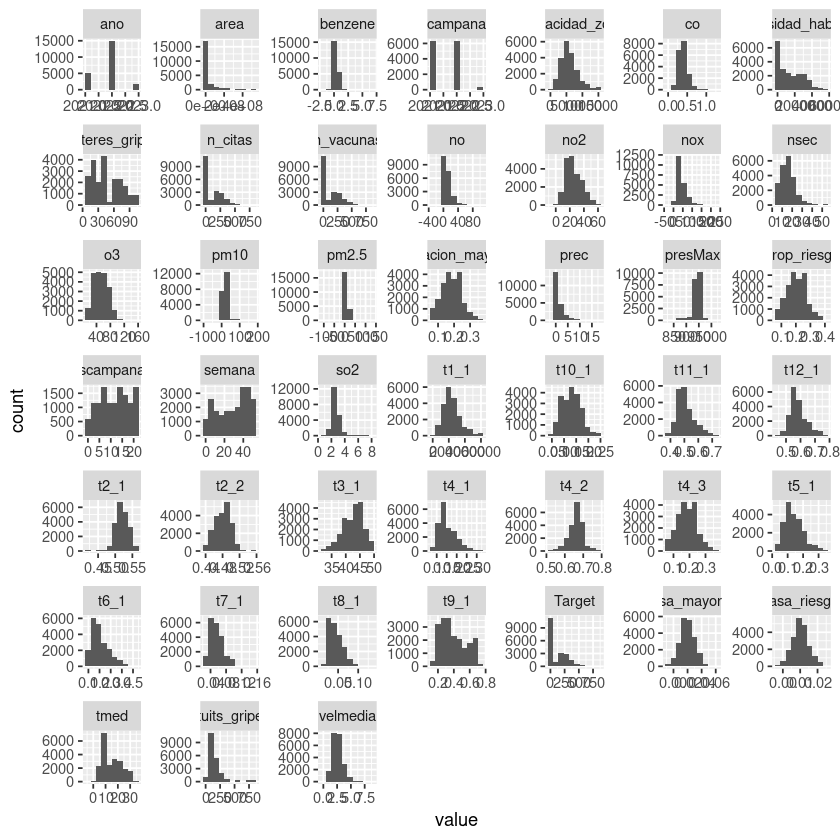

In [18]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

Warning message:
“Removed 49988 rows containing non-finite values (`stat_boxplot()`).”


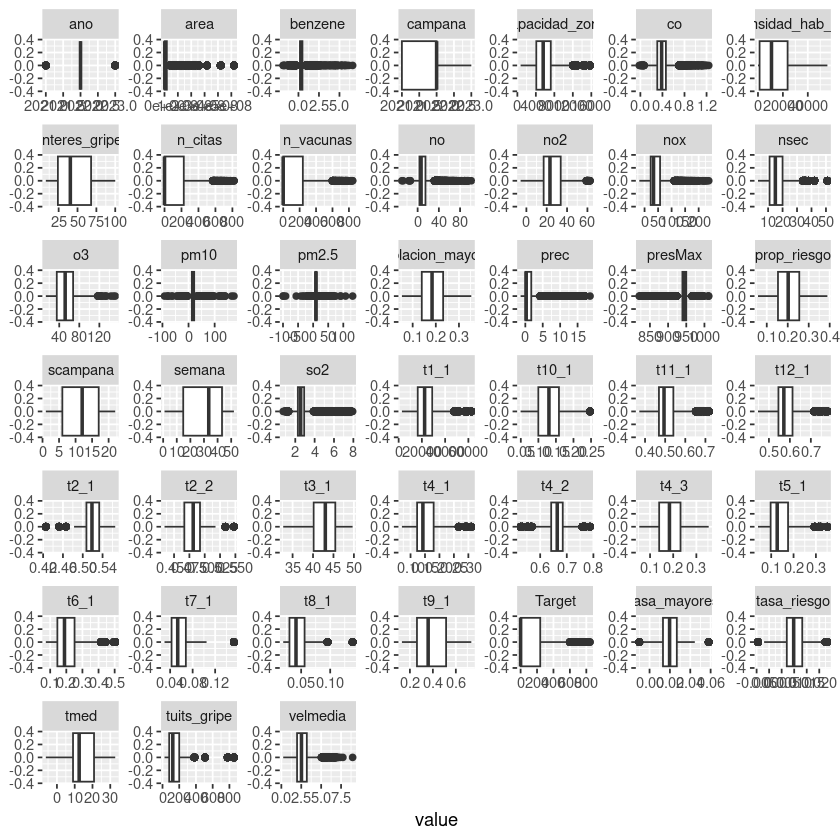

In [19]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

Warning message:
“Removed 49988 rows containing non-finite values (`stat_ydensity()`).”


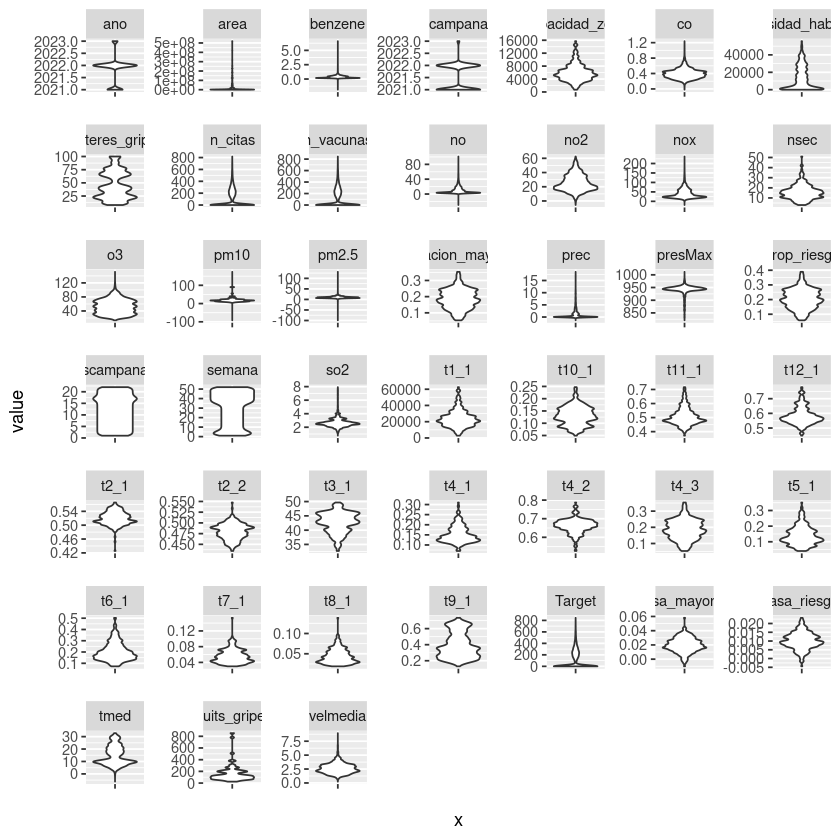

In [20]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

Warning message:
“Removed 49988 rows containing non-finite values (`stat_density()`).”


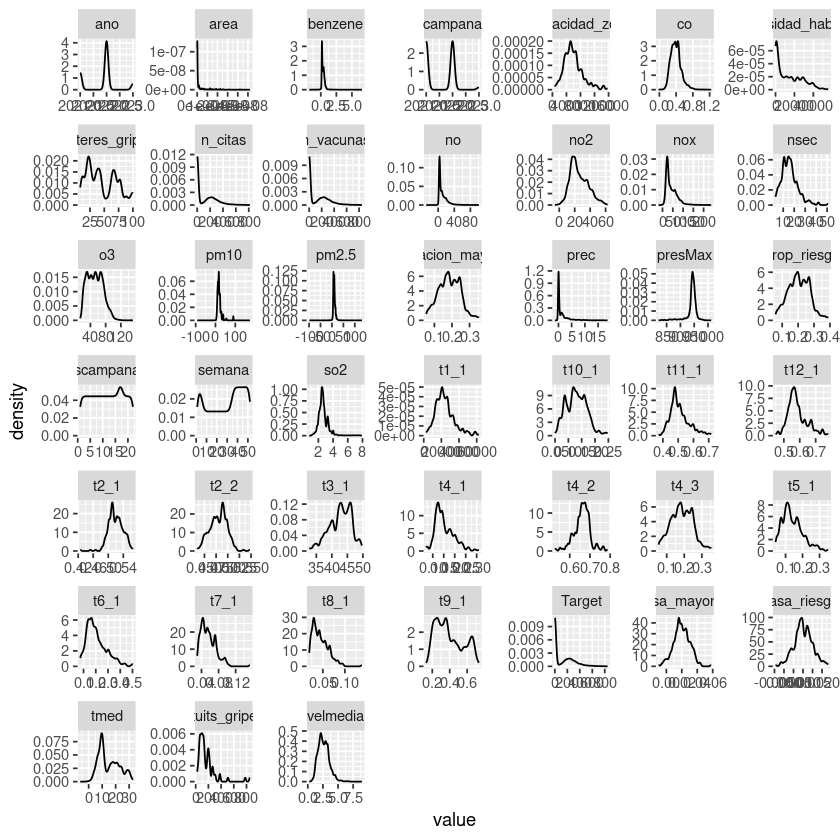

In [21]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [22]:
# Category colums
char_cols <- data |> select(where(~ !is.numeric(.x))) |> colnames()
char_cols

[1] "GEOCODIGO"   "DESBDT"      "nombre_zona" "is_train"

In [23]:
# Category colums
char_data <- data |> select(where(~ !is.numeric(.x))) 
char_data

GEOCODIGO,DESBDT,nombre_zona,is_train
<chr>,<chr>,<chr>,<lgl>
259,V Centenario,V Centenario,TRUE
260,Valdeacederas,Valdeacederas,TRUE
041,Canillejas,Canillejas,TRUE
025,Barajas,Barajas,TRUE
046,Castelló,Castelló,TRUE
159,Mar Báltico,Mar Báltico,TRUE
065,Daroca,Daroca,TRUE
092,Felipe II,Felipe II,TRUE
221,Ramón y Cajal,Ramón y Cajal,TRUE


### Most frequent entry

* Ver salida de `summarytools::freq()` arriba

In [24]:
# Calculate and visualizate the ratio of the most frequent entry for each feature


### Visualization of categorical variables

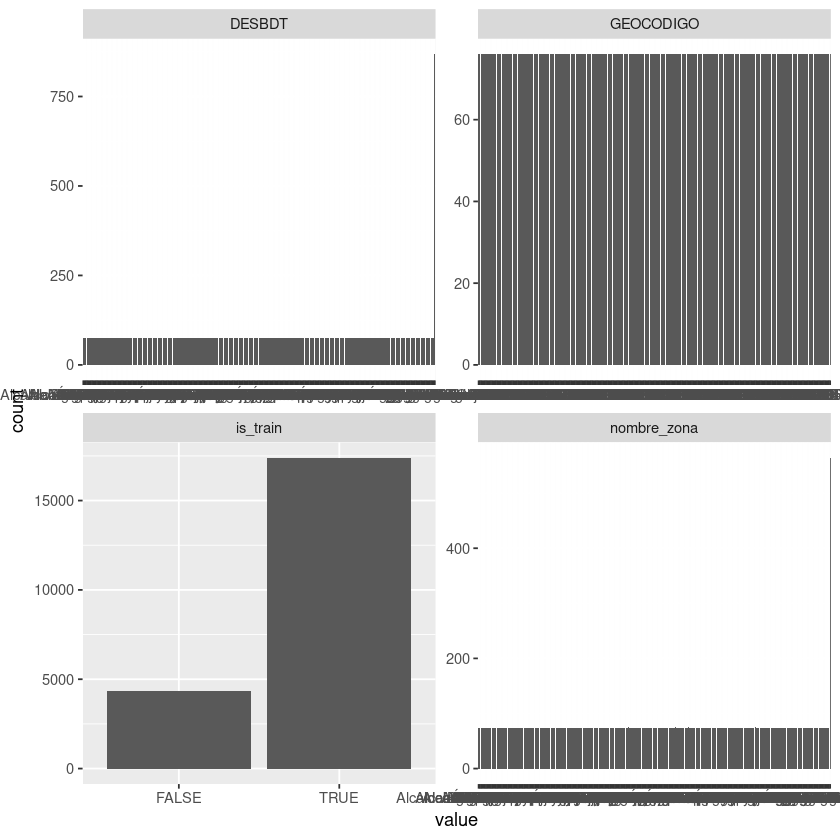

In [25]:
# returns a visualization of the number and frequency of categorical features
char_data |>
  mutate(across(c(GEOCODIGO, is_train), as.character))|>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_bar() +
  facet_wrap(~name, scales = "free")

## Statistical Normality Tests

In [26]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Anderson-Darling



In [27]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$ano

	Anderson-Darling normality test

data:  X[[i]]
A = 3204.4, p-value < 2.2e-16


$area

	Anderson-Darling normality test

data:  X[[i]]
A = 4074, p-value < 2.2e-16


$benzene

	Anderson-Darling normality test

data:  X[[i]]
A = 1253.5, p-value < 2.2e-16


$campana

	Anderson-Darling normality test

data:  X[[i]]
A = 1935.2, p-value < 2.2e-16


$capacidad_zona

	Anderson-Darling normality test

data:  X[[i]]
A = 249.43, p-value < 2.2e-16


$co

	Anderson-Darling normality test

data:  X[[i]]
A = 113.58, p-value < 2.2e-16


$densidad_hab_km

	Anderson-Darling normality test

data:  X[[i]]
A = 803.67, p-value < 2.2e-16


$interes_gripe

	Anderson-Darling normality test

data:  X[[i]]
A = 462.93, p-value < 2.2e-16


$n_citas

	Anderson-Darling normality test

data:  X[[i]]
A = 1859.4, p-value < 2.2e-16


$n_vacunas

	Anderson-Darling normality test

data:  X[[i]]
A = 1860.1, p-value < 2.2e-16


$no

	Anderson-Darling normality test

data:  X[[i]]
A = 1373.8, p-value < 2.2e-16


$no2



### Test de Lilliefors



In [28]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$ano

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.37831, p-value < 2.2e-16


$area

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.33211, p-value < 2.2e-16


$benzene

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18762, p-value < 2.2e-16


$campana

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.3265, p-value < 2.2e-16


$capacidad_zona

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.08838, p-value < 2.2e-16


$co

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.058011, p-value < 2.2e-16


$densidad_hab_km

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.15089, p-value < 2.2e-16


$interes_gripe

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.11073, p-value < 2.2e-16


$n_citas

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.32199, p-value < 2.2e-16


$n_vacunas

	Lilliefors (Kolmogorov-S

### QQ-plots

Warning message:
“Removed 49988 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 49988 rows containing non-finite values (`stat_qq_line()`).”


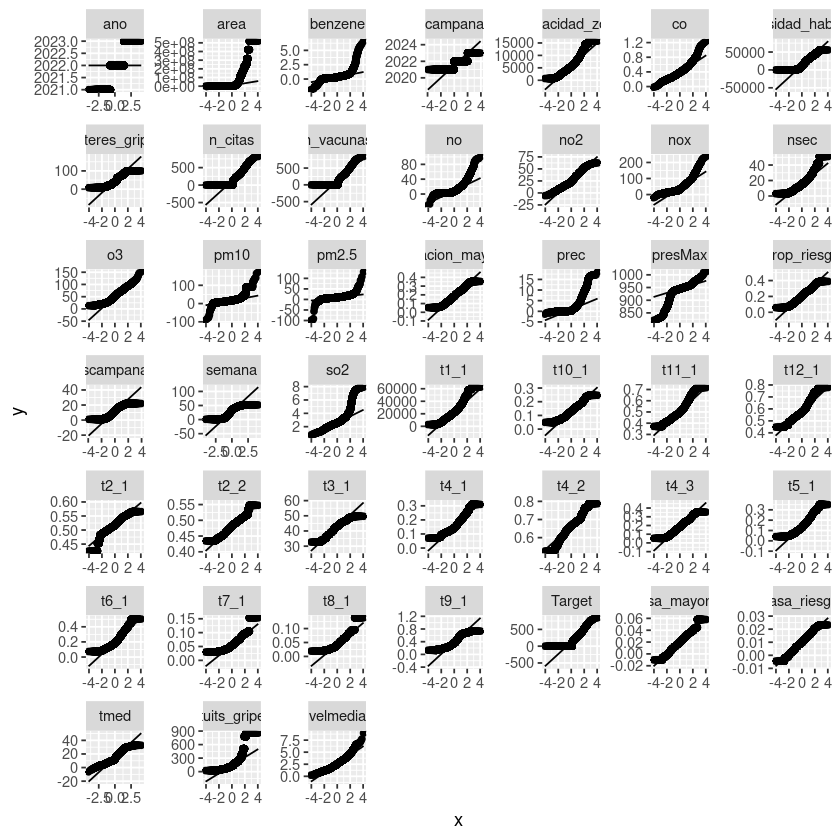

In [29]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [30]:
cor(cdata, use = "pairwise.complete.obs")

,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,benzene,co,⋯,t8_1,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target
ano,1.000000e+00,-5.447924e-01,-0.139205766,-0.1396378180,-0.0783355513,-0.1235730705,0.004608101,0.0291706895,0.0578430068,0.1422034300,⋯,-9.399595e-21,-3.203068e-21,-1.929818e-20,1.524731e-20,-2.554420e-20,-2.892324e-05,-7.554165e-21,-2.446546e-01,-2.233746e-01,-0.139205766
semana,-5.447924e-01,1.000000e+00,0.334390680,0.3345730567,0.1765009232,0.1598153824,-0.050838420,-0.0575500675,-0.1844925799,0.1085792345,⋯,2.841457e-21,9.771772e-22,6.326965e-21,1.252694e-20,-1.593539e-20,-8.302506e-05,-6.325648e-23,1.041019e-01,4.158134e-01,0.334390680
n_vacunas,-1.392058e-01,3.343907e-01,1.000000000,0.9994130927,-0.5076992141,0.1320836211,-0.128334238,0.1085989551,0.1648882327,0.1797862274,⋯,6.226053e-02,8.208630e-02,-8.753003e-02,1.080744e-01,8.971366e-02,-4.610218e-02,1.255742e-03,3.917415e-01,7.179915e-01,1.000000000
n_citas,-1.396378e-01,3.345731e-01,0.999413093,1.0000000000,-0.5072762815,0.1318974110,-0.127649882,0.1085893935,0.1646747289,0.1796254744,⋯,6.263422e-02,8.218354e-02,-8.759665e-02,1.082114e-01,8.984162e-02,-4.618035e-02,1.098393e-03,3.919383e-01,7.173853e-01,0.999413093
tmed,-7.833555e-02,1.765009e-01,-0.507699214,-0.5072762815,1.0000000000,-0.2020624221,0.060526552,0.0422843432,-0.3929425120,-0.1423984820,⋯,-1.688827e-02,-1.026982e-02,1.649493e-02,-1.997776e-02,-1.763918e-02,-6.920661e-02,5.810234e-02,-4.506697e-01,-5.332773e-01,-0.507699214
prec,-1.235731e-01,1.598154e-01,0.132083621,0.1318974110,-0.2020624221,1.0000000000,0.132872270,-0.1606939889,-0.0008302597,0.0143431064,⋯,3.646056e-02,4.545264e-02,-3.902830e-02,1.961123e-02,8.187432e-03,3.564142e-02,-2.624009e-02,-2.734226e-02,2.911162e-01,0.132083621
velmedia,4.608101e-03,-5.083842e-02,-0.128334238,-0.1276498824,0.0605265523,0.1328722702,1.000000000,-0.1915884538,-0.1433629985,-0.1070852798,⋯,-3.812946e-02,-8.387615e-02,4.013412e-02,2.967087e-02,4.861368e-02,-3.727211e-02,-7.280959e-02,-6.703733e-02,-1.550209e-01,-0.128334238
presMax,2.917069e-02,-5.755007e-02,0.108598955,0.1085893935,0.0422843432,-0.1606939889,-0.191588454,1.0000000000,0.0188061130,-0.2647197565,⋯,-1.663459e-01,-2.081400e-01,1.947087e-01,-4.235540e-02,2.516802e-02,-2.122553e-01,1.503359e-01,8.425508e-02,3.343166e-02,0.108598955
benzene,5.784301e-02,-1.844926e-01,0.164888233,0.1646747289,-0.3929425120,-0.0008302597,-0.143362998,0.0188061130,1.0000000000,0.0584640101,⋯,-4.133501e-03,5.985641e-03,-2.476234e-02,4.135210e-02,3.887223e-02,3.274150e-02,-7.470426e-02,2.074035e-01,1.914826e-01,0.164888233
co,1.422034e-01,1.085792e-01,0.179786227,0.1796254744,-0.1423984820,0.0143431064,-0.107085280,-0.2647197565,0.0584640101,1.0000000000,⋯,1.709260e-01,8.860305e-02,-1.922463e-01,1.477184e-01,9.399833e-02,1.127755e-01,-2.111461e-01,4.632043e-02,1.586900e-01,0.179786227


## Regression analysis

### Modelo completo regresión lineal simple

In [31]:
cdata_filtered <- data |>
    filter(is_train == TRUE) |>
    na.omit()

modelo <- lm(Target ~ ., data = cdata_filtered)
summary(modelo)


Call:
lm(formula = Target ~ ., data = cdata_filtered)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.208e-12 -1.100e-14  2.000e-15  1.400e-14  3.165e-11 

Coefficients: (587 not defined because of singularities)
                                         Estimate Std. Error    t value
(Intercept)                             6.921e-11  2.901e-11  2.386e+00
GEOCODIGO002                            2.970e-13  1.129e-13  2.632e+00
GEOCODIGO003                            1.098e-14  1.067e-13  1.030e-01
GEOCODIGO004                            1.727e-13  1.058e-13  1.633e+00
GEOCODIGO005                            1.689e-14  1.076e-13  1.570e-01
GEOCODIGO006                            1.423e-13  1.081e-13  1.317e+00
GEOCODIGO007                            3.798e-13  1.060e-13  3.581e+00
GEOCODIGO008                            5.047e-14  1.067e-13  4.730e-01
GEOCODIGO009                            3.097e-13  1.057e-13  2.930e+00
GEOCODIGO010                            1.4

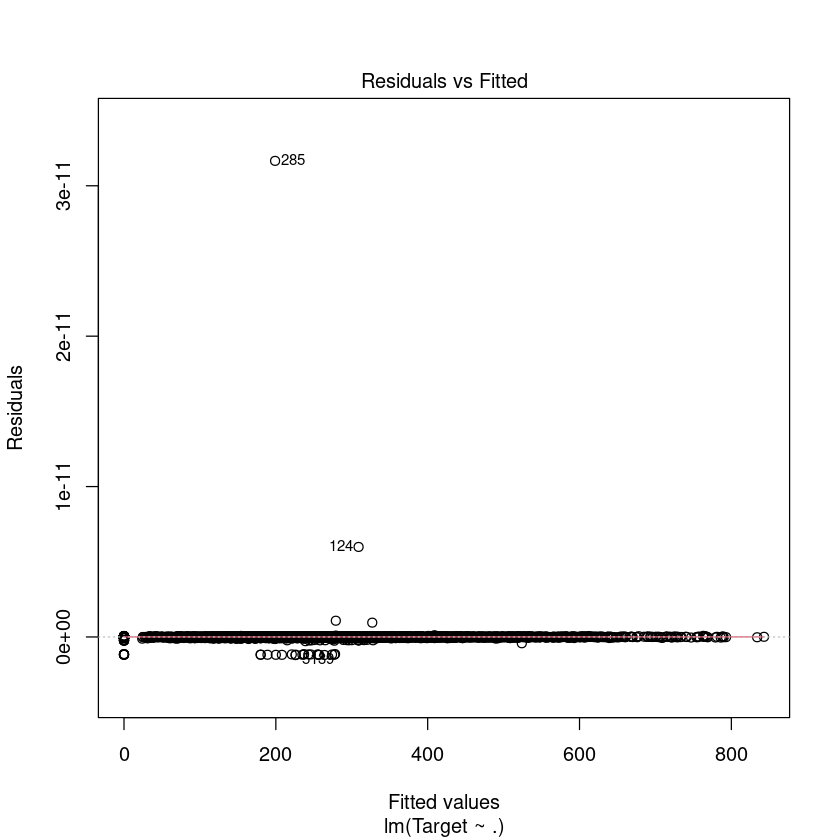

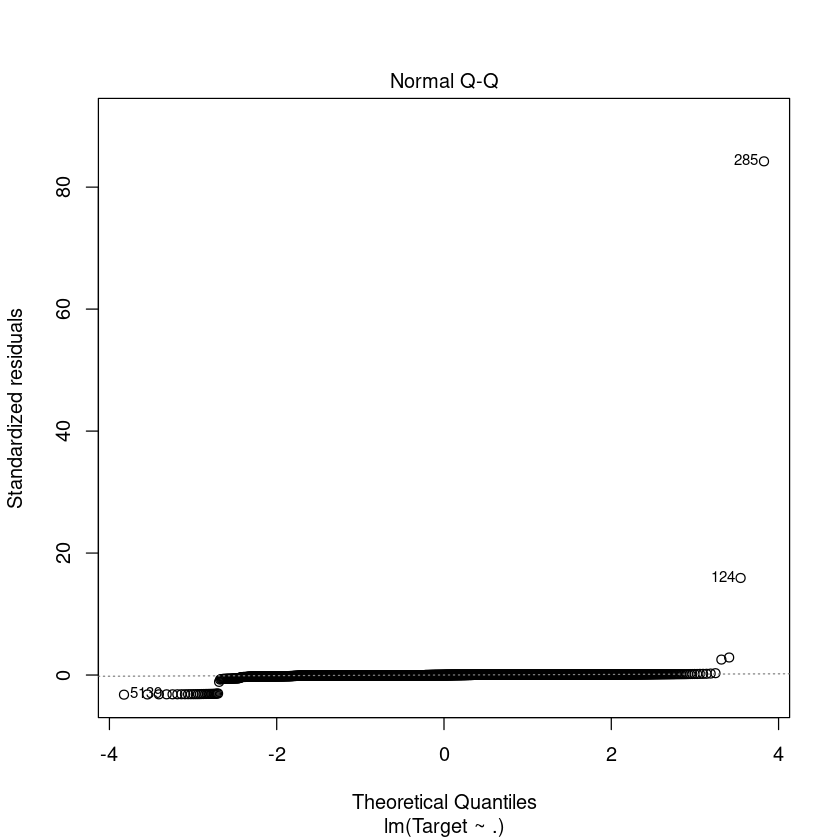

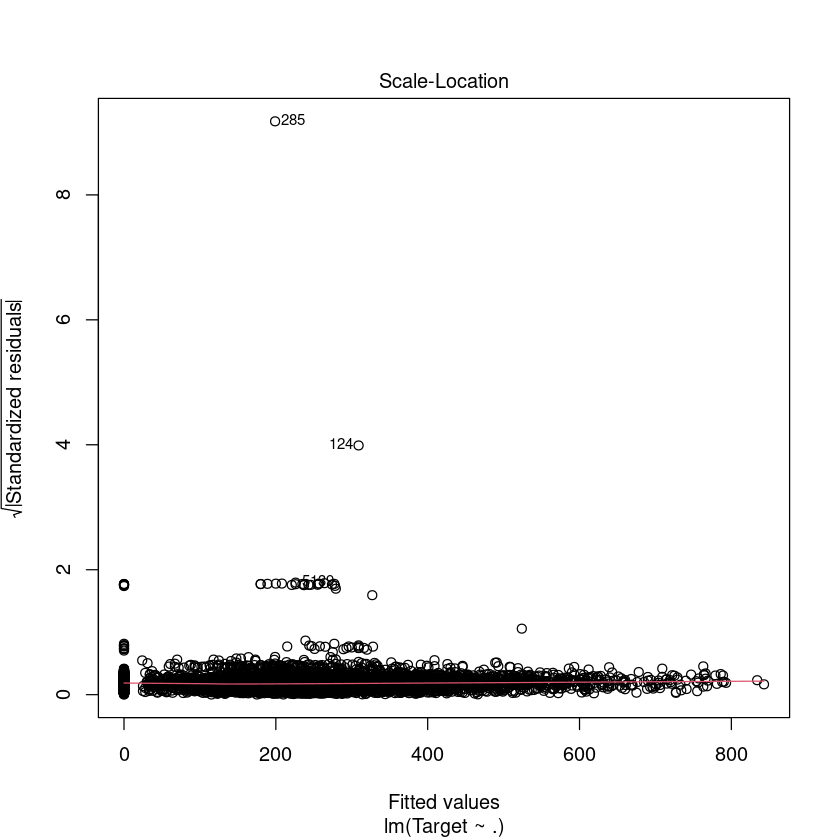

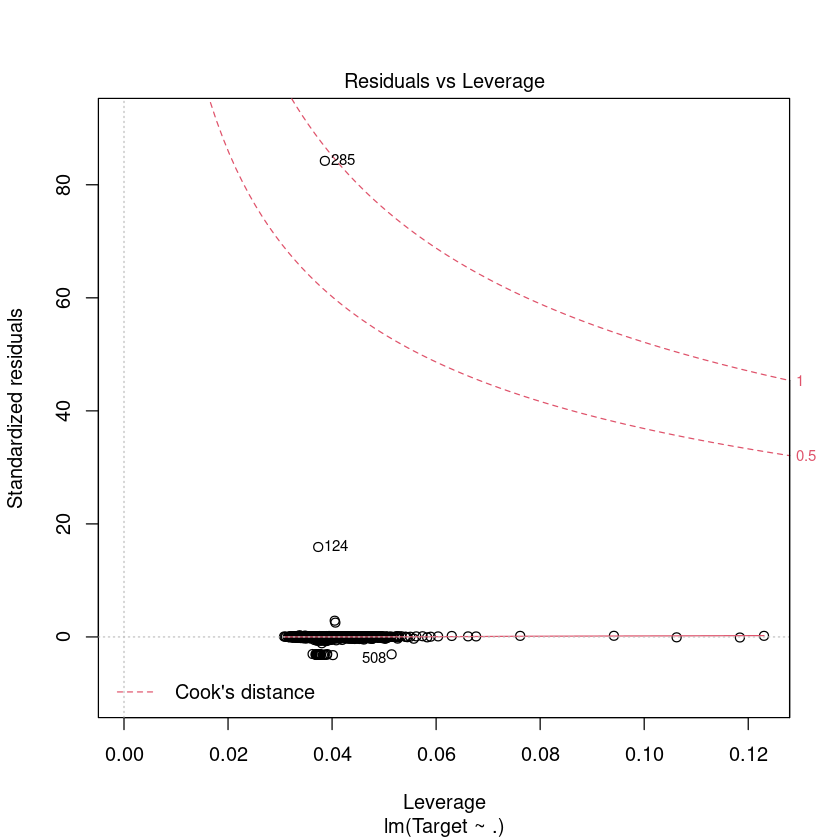

In [32]:
plot(modelo)

### Selección de variables

Puede que dé error por la estructura de los datos, en ese caso dejarlo indicado

In [33]:
modelo2 <- step(modelo, trace = FALSE)
summary(modelo2)


Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


## Stationary analysis

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

In [ ]:
tsdata <- data |>
    mutate(fecha = as.Date(parse_date_time(paste(ano, semana, 1, sep="/"),'Y/W/w')))

In [ ]:
names(data)

Todas las series, probablemente habría que filtrar por geografía

In [ ]:
tsdata |> 
  mutate(across(c(n_vacunas, nombre_zona), as.character))
  pivot_longer(cols = n_vacunas:interes_gripe) |> 
  ggplot(aes(x = fecha, y = value)) +
  geom_line() +
  facet_wrap(~name, scales = "free")